# Preprocessing

the code for this section is similar to the group project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
import torch.nn.functional as F
from sklearn.metrics import roc_curve, plot_roc_curve
from sklearn.metrics import roc_curve, auc
from joblib import dump,load

In [120]:
bank=pd.read_csv('bank.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [121]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [122]:
bank.shape

(11162, 17)

In [123]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

we can see that there are no null values.

In [124]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


in the next few cells we will check the value counts of each column.

In [125]:
bank['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [126]:
bank['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [127]:
bank['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [128]:
bank['default'].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [129]:
bank['housing'].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [130]:
bank['loan'].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [131]:
bank['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [132]:
bank['month'].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [133]:
bank['campaign'].value_counts()

1     4798
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
18       8
21       8
20       5
19       5
24       5
22       4
30       4
23       3
25       3
26       3
32       2
43       2
29       2
33       1
28       1
41       1
27       1
63       1
31       1
Name: campaign, dtype: int64

In [134]:
bank['pdays'].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: pdays, Length: 472, dtype: int64

In [135]:
bank['previous'].value_counts()

0     8324
1      887
2      693
3      435
4      244
5      165
6      117
7       77
8       60
9       34
10      30
11      23
12      16
13      11
17      11
14       6
15       5
19       4
16       2
20       2
27       2
23       2
40       1
41       1
28       1
18       1
58       1
55       1
26       1
21       1
22       1
30       1
29       1
37       1
Name: previous, dtype: int64

In [136]:
bank['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [137]:
bank['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

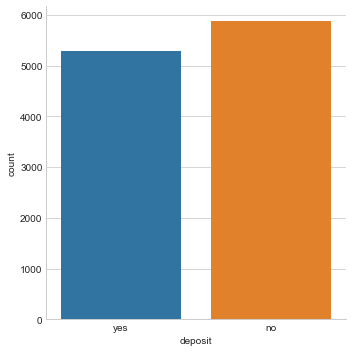

In [138]:
sns.catplot(data=bank,x='deposit',kind='count')

we can see that fortunately, our dataset is balanced.

# Encoding the categorical variables

we will encode the categorical variables using label encoding,
the code for this section is similar to group coursework.

In [139]:
bank1=bank.copy() # creating a copy of the original dataset, just in case 
encoder = LabelEncoder()
columns_to_encode = ['job', 'marital', 'education','default','housing','loan','contact','month','poutcome','deposit']
bank1[columns_to_encode] = bank1[columns_to_encode].apply(encoder.fit_transform)
print(bank1)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       59    0        1          1        0     2343        1     0        2   
1       56    0        1          1        0       45        0     0        2   
2       41    9        1          1        0     1270        1     0        2   
3       55    7        1          1        0     2476        1     0        2   
4       54    0        1          2        0      184        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
11157   33    1        2          0        0        1        1     0        0   
11158   39    7        1          1        0      733        0     0        2   
11159   32    9        2          1        0       29        0     0        0   
11160   43    9        1          1        0        0        0     1        0   
11161   34    9        1          1        0        0        0     0        0   

       day  month  duration

# Correlation Analysis

here i created a heatmap to see the correlation between variables
the codes relating to correlation and heatmap is similar to the 'lab feedbac 04' from PODS course with changes in size and color and instead of pearson i used spearman

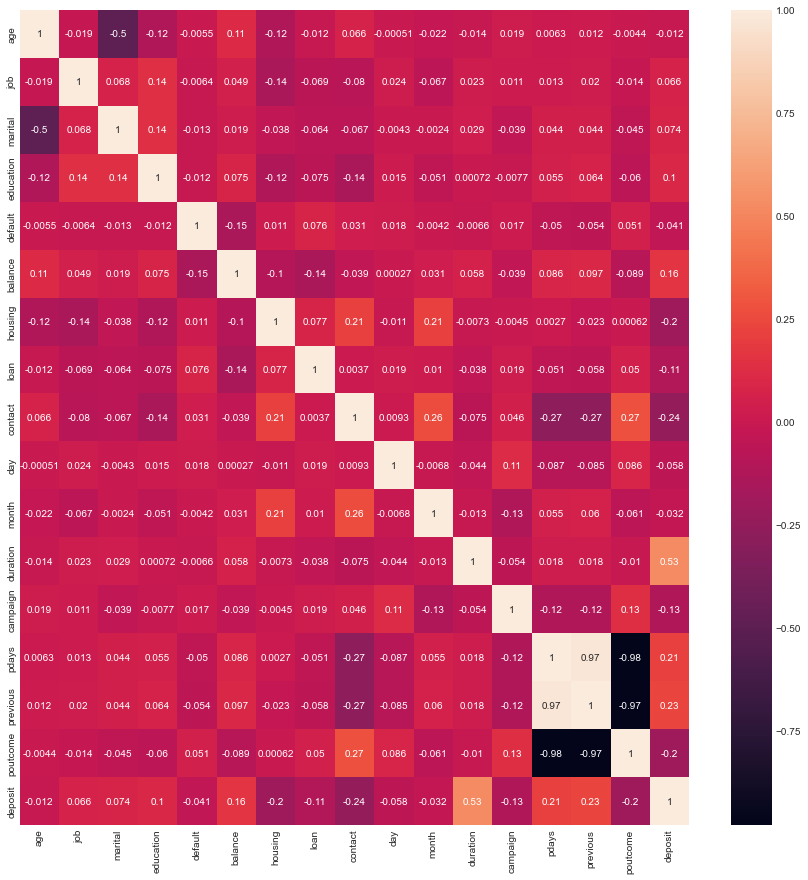

In [140]:
corr =bank1.corr(method = 'spearman')
plt.figure(figsize = (15,15))
ax = sns.heatmap(corr, annot = True)

extracting the top most correlatied features:

In [141]:

corr1=corr.copy()
corr1.index.name = 'var1'
corr1.reset_index(inplace=True)
corr_pair=corr1.melt(id_vars=['var1'])
corr_pair=corr_pair.rename(columns={'variable': 'var2','value': 'corr'})
corr_pair = corr_pair.drop(corr_pair[corr_pair['var1']==corr_pair['var2']].index)
corr_pair=corr_pair.sort_values(by ='corr',ascending=False)

print()
print("Top ten most positively correlated pairs of variables")
print(corr_pair.head(10))

print()
print("Top ten most negatively correlated pairs of variables (in reverse order)")
print(corr_pair.tail(10))


corr_pair['abs_corr']=abs(corr_pair['corr'])

corr_pair=corr_pair.sort_values(by ='abs_corr',ascending=False)

print()
print("correlation between deposit and other variables")
print(corr_pair[corr_pair['var1']=='deposit'].head(7))


Top ten most positively correlated pairs of variables
         var1      var2      corr
235  previous     pdays  0.969272
251     pdays  previous  0.969272
203   deposit  duration  0.527801
283  duration   deposit  0.527801
263   contact  poutcome  0.273072
151  poutcome   contact  0.273072
146     month   contact  0.258756
178   contact     month  0.258756
254   deposit  previous  0.229905
286  previous   deposit  0.229905

Top ten most negatively correlated pairs of variables (in reverse order)
         var1      var2      corr
149     pdays   contact -0.270291
229   contact     pdays -0.270291
150  previous   contact -0.270622
246   contact  previous -0.270622
34        age   marital -0.498236
2     marital       age -0.498236
253  poutcome  previous -0.973019
269  previous  poutcome -0.973019
268     pdays  poutcome -0.980790
236  poutcome     pdays -0.980790

correlation between deposit and other variables
        var1      var2      corr  abs_corr
203  deposit  duration  0.52780

 # Normalization and Box plots

before applying normalization, lets check the distribution of numerical variables:

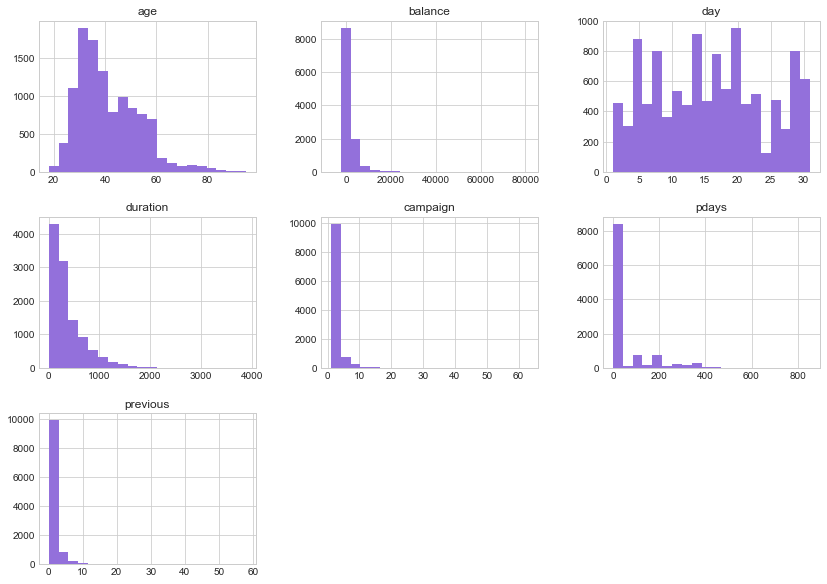

In [142]:
columns_to_normalize=['age','balance','day','duration','campaign','pdays','previous']
numeric_bank = bank.loc[:, columns_to_normalize]
plt.style.use('seaborn-whitegrid')
numeric_bank.hist(bins=20, figsize=(14,10), color='#9370DB')
plt.show()

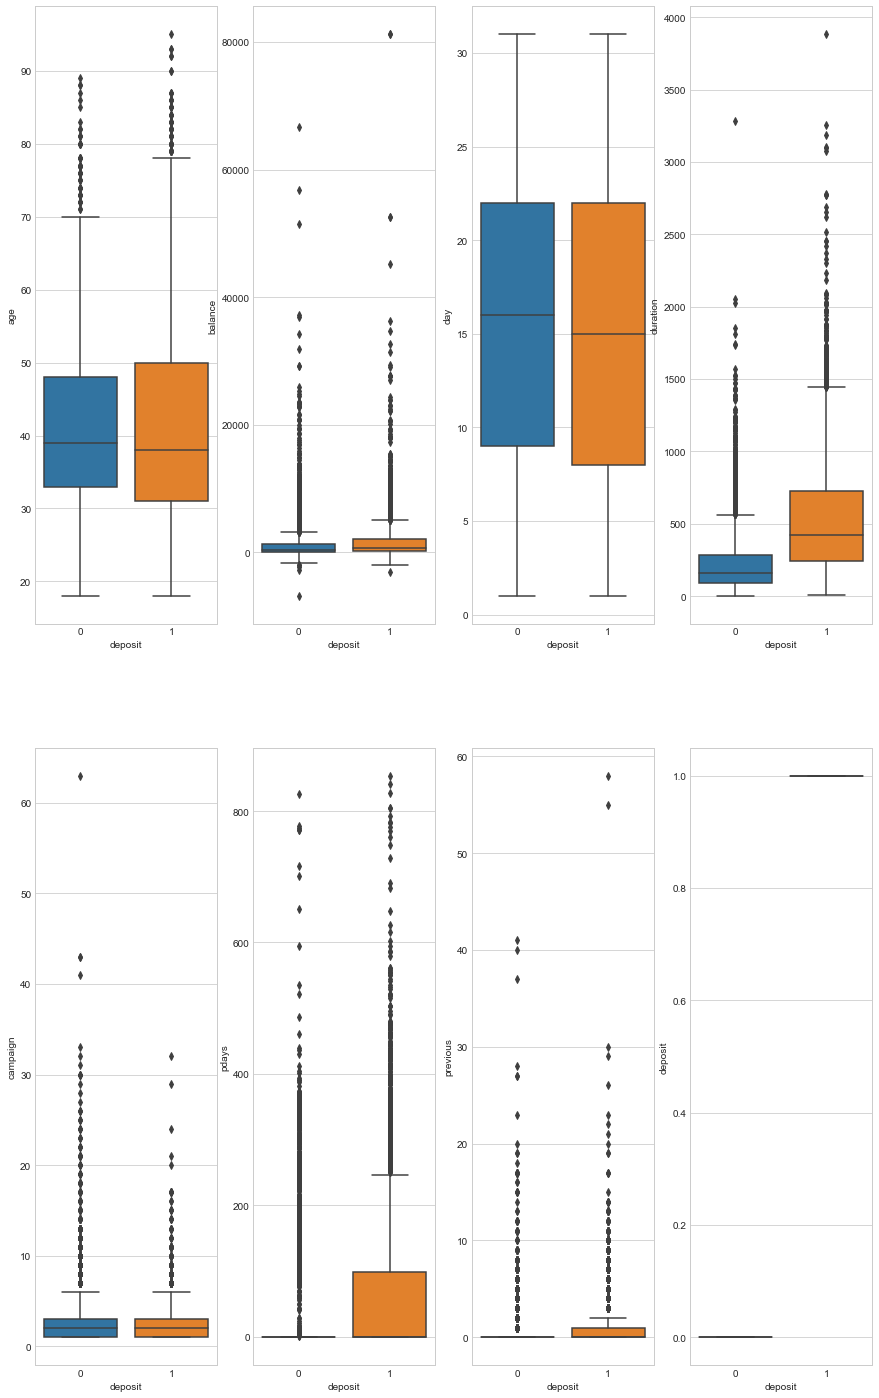

In [143]:
numeric_bank['deposit']=bank1['deposit']
i = 1
plt.figure(figsize = (15,25))
for features in numeric_bank.columns:
    plt.subplot(2,4,i)
    sns.boxplot(y = numeric_bank[features], x= numeric_bank.deposit)
    i+=1

In [144]:
bank1[columns_to_normalize] = preprocessing.normalize(bank1[columns_to_normalize]) # normalizing the numerical columns
bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0.023002,0,1,1,0,0.913471,1,0,2,0.001949,8,0.406247,0.000390,-0.000390,0.000000,3,1
1,0.038127,0,1,1,0,0.030638,0,0,2,0.003404,8,0.998797,0.000681,-0.000681,0.000000,3,1
2,0.021779,9,1,1,0,0.674623,1,0,2,0.002656,8,0.737836,0.000531,-0.000531,0.000000,3,1
3,0.021625,7,1,1,0,0.973501,1,0,2,0.001966,8,0.227648,0.000393,-0.000393,0.000000,3,1
4,0.077164,0,1,2,0,0.262929,0,0,2,0.007145,8,0.961693,0.002858,-0.001429,0.000000,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.126979,1,2,0,0,0.003848,1,0,0,0.076957,0,0.988893,0.003848,-0.003848,0.000000,3,0
11158,0.052781,7,1,1,0,0.992016,0,0,2,0.021654,6,0.112329,0.005413,-0.001353,0.000000,3,0
11159,0.196326,9,2,1,0,0.177921,0,0,0,0.116569,1,0.957091,0.012270,-0.006135,0.000000,3,0
11160,0.241867,9,1,1,0,0.000000,0,1,0,0.044999,8,0.050623,0.011250,0.967468,0.028124,0,0


now our data is ready for building models

# Splitting the data

In [66]:
# the code in this cell is similar to the group coursework
scaler = MinMaxScaler() # Function to prepare the data for training and test

def prepare_data(bank1):
    X = bank1.iloc[:, 0:-1]
    y = bank1['deposit']
    print(X)
    
# splitting into trainval and test sets
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True) # spliting the data into 30% test and 70% train
    
# separating 10% of trainval set as validation set 
    X_train, X_val, y_train, y_val= train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=42, shuffle=True) # splitting the training set into train and validation sets

# changing into numpy array
    X_trainval1 =np.array(X_trainval)
    X_test1 =np.array(X_test)
    y_trainval1 =np.array(y_trainval)
    y_test1 =np.array(y_test)
    
    X_train1=np.array(X_train)
    X_val1=np.array(X_val)
    y_train1=np.array(y_train)
    y_val1=np.array(y_val)
    
    
    return X_trainval1, X_test1, X_train1, X_val1, y_trainval1, y_test1,y_train1, y_val1

X_trainval1, X_test1, X_train1, X_val1,y_trainval1, y_test1, y_train1, y_val1 = prepare_data(bank1) # Show the data

            age  job  marital  education  default   balance  housing  loan  \
0      0.023002    0        1          1        0  0.913471        1     0   
1      0.038127    0        1          1        0  0.030638        0     0   
2      0.021779    9        1          1        0  0.674623        1     0   
3      0.021625    7        1          1        0  0.973501        1     0   
4      0.077164    0        1          2        0  0.262929        0     0   
...         ...  ...      ...        ...      ...       ...      ...   ...   
11157  0.126979    1        2          0        0  0.003848        1     0   
11158  0.052781    7        1          1        0  0.992016        0     0   
11159  0.196326    9        2          1        0  0.177921        0     0   
11160  0.241867    9        1          1        0  0.000000        0     1   
11161  0.054055    9        1          1        0  0.000000        0     0   

       contact       day  month  duration  campaign     pdays  

In [67]:
X_train1

array([[ 6.58103813e-02,  1.00000000e+00,  1.00000000e+00, ...,
         3.23069144e-01,  2.39310477e-03,  0.00000000e+00],
       [ 3.89894283e-02,  4.00000000e+00,  1.00000000e+00, ...,
        -1.11398367e-03,  0.00000000e+00,  3.00000000e+00],
       [ 1.57965580e-01,  1.00000000e+00,  1.00000000e+00, ...,
        -3.43403435e-03,  0.00000000e+00,  3.00000000e+00],
       ...,
       [ 3.71665303e-02,  1.00000000e+01,  1.00000000e+00, ...,
        -1.06190086e-03,  0.00000000e+00,  3.00000000e+00],
       [ 1.70975358e-01,  4.00000000e+00,  2.00000000e+00, ...,
        -4.38398353e-03,  0.00000000e+00,  3.00000000e+00],
       [ 1.89093781e-02,  9.00000000e+00,  1.00000000e+00, ...,
         4.00674390e-01,  1.53319282e-03,  0.00000000e+00]])

# MLP model implementation

we will start training the model with one hidden layer.As in the groupwork number of neurons in the hidden layer=13 gave the best accuracy(69%), we will start with that.

In [82]:
mlp= MLPClassifier(hidden_layer_sizes=(13,), activation='relu', solver='adam', max_iter=200, batch_size='auto')
mlp.fit(X_train1, y_train1) # fitting the train data to the model
predict_val = mlp.predict(X_val1) # predictiong on the validation set
print(confusion_matrix(y_val1,predict_val)) # getting the performance metrices
print(classification_report(y_val1,predict_val))

[[344  69]
 [ 95 274]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       413
           1       0.80      0.74      0.77       369

    accuracy                           0.79       782
   macro avg       0.79      0.79      0.79       782
weighted avg       0.79      0.79      0.79       782



C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [83]:
print(f'Train Accuracy - : {mlp.score(X_train1,y_train1):.5f}') # getting the accuracy of train set
print(f' Validation Accuracy - : {mlp.score(X_val1,y_val1):.5f}') # getting the accuracy of validation set

Train Accuracy - : 0.77315
 Validation Accuracy - : 0.79028


 now we will experiment with two hidden layers to see the changes in accuracy.

In [84]:
mlp= MLPClassifier(hidden_layer_sizes=(13,13,), activation='relu', solver='adam', max_iter=200,batch_size='auto')
mlp.fit(X_train1, y_train1)
predict_val = mlp.predict(X_val1)
print(confusion_matrix(y_val1,predict_val))
print(classification_report(y_val1,predict_val))

[[344  69]
 [ 72 297]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       413
           1       0.81      0.80      0.81       369

    accuracy                           0.82       782
   macro avg       0.82      0.82      0.82       782
weighted avg       0.82      0.82      0.82       782



C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [85]:
print(f'Train Accuracy - : {mlp.score(X_train1,y_train1):.5f}')
print(f' validation Accuracy - : {mlp.score(X_val1,y_val1):.5f}')

Train Accuracy - : 0.80259
 validation Accuracy - : 0.81969


by adding one more hidden layer, the train and validation set accuracies improved(from 80 to 81), now we will add one more layer to see the changes.

In [86]:
mlp= MLPClassifier(hidden_layer_sizes=(13,13,13), activation='relu', solver='adam', max_iter=200,batch_size='auto')
mlp.fit(X_train1, y_train1)
predict_val = mlp.predict(X_val1)
print(confusion_matrix(y_val1,predict_val))
print(classification_report(y_val1,predict_val))

[[320  93]
 [ 56 313]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       413
           1       0.77      0.85      0.81       369

    accuracy                           0.81       782
   macro avg       0.81      0.81      0.81       782
weighted avg       0.81      0.81      0.81       782



C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [87]:
print(f'Train Accuracy - : {mlp.score(X_train1,y_train1):.5f}')
print(f' validation Accuracy - : {mlp.score(X_val1,y_val1):.5f}')

Train Accuracy - : 0.80330
 validation Accuracy - : 0.80946


we see that the accuracy decreased fro both train and validation sets, lets add on emore layer

In [36]:
mlp= MLPClassifier(hidden_layer_sizes=(13,13,13,13,), activation='relu', solver='adam', max_iter=200,batch_size='auto')
mlp.fit(X_train1, y_train1)
predict_val = mlp.predict(X_val1)
print(confusion_matrix(y_val1,predict_val))
print(classification_report(y_val1,predict_val))

[[335  78]
 [ 72 297]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       413
           1       0.79      0.80      0.80       369

    accuracy                           0.81       782
   macro avg       0.81      0.81      0.81       782
weighted avg       0.81      0.81      0.81       782



C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
print(f'Train Accuracy - : {mlp.score(X_train1,y_train1):.3f}')
print(f' validation Accuracy - : {mlp.score(X_val1,y_val1):.3f}')

Train Accuracy - : 0.807
 validation Accuracy - : 0.808


this time the accuracy is more than 3 hidden layers, but still 2 hidden layers had the best performance for both sets, as a result, in the grid search we will only experiment with two hidden layers with different number of neurons.

### Gridsearch for MLP

In [39]:
time_before=time.time() # for calculating the time it takes for the grid search to run
params = {

    'hidden_layer_sizes': [(11, 13,),(11,15,),(13,15,),(13, 11,),(15,11,),(15,13,)], # the dimension of the tuples give us the number of hidden layers
    'learning_rate_init': [0.01,0.1,1],
    'momentum': [0.1,0.5,0.9],
    'max_iter': [100,500,1000,2000],
    'batch_size': [100, 200, 500,1000],
}

gsearch = GridSearchCV(mlp, params, cv=5,verbose=6) 
gsearch.fit(X_train1, y_train1)

time_after=time.time()
time_spent=time_after-time_before
time_spent

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.758 total time=   5.1s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.792 total time=   5.0s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.803 total time=   5.3s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.801 total time=   2.7s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.787 total time=   4.3s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.792 total time=   5.7s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.789 total time=   4.7s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.801 total time=   4.7s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.796 total time=   5.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.797 total time=   5.0s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.780 total time=   2.3s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.767 total time=   5.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.798 total time=   5.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.799 total time=   4.7s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.773 total time=   5.0s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.780 total time=   4.7s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.798 total time=   4.6s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.779 total time=   4.4s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.798 total time=   4.7s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.797 total time=   7.1s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.5;, score=0.790 total time=   5.4s

[CV 3/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.742 total time=   2.0s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.752 total time=   1.7s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.6s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.763 total time=   1.6s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.783 total time=   1.5s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.764 total time=   2.3s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.749 total time=   2.0s
[CV 5/

[CV 1/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   1.4s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.8s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.471 total time=   1.7s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.472 total time=   1.0s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.7s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.529 total time=   1.0s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.471 total time=   0.6s
[CV 3/5] END batch_s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.787 total time=   4.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.780 total time=   5.1s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.800 total time=   4.2s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.794 total time=   4.1s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.786 total time=   4.5s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.774 total time=   5.0s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.791 total time=   3.9s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.797 total time=   4.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.807 total time=   4.8s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.773 total time=   4.3s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.757 total time=   4.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.780 total time=   4.7s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.788 total time=   4.5s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.791 total time=   4.3s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.789 total time=   4.1s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.778 total time=   5.8s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.797 total time=   5.6s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.799 total time=   6.0s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.797 total time=   6.8s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.791 total time=   7.9s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.5;, score=0.795 total time=   5.2s

[CV 3/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.750 total time=   3.0s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.726 total time=   0.9s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.764 total time=   3.4s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.793 total time=   2.2s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.765 total time=   1.3s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.752 total time=   1.2s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.747 total time=   1.3s
[CV 5/

[CV 1/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.471 total time=   1.8s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.471 total time=   0.6s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.7s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.472 total time=   0.6s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   1.3s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.471 total time=   0.6s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.471 total time=   0.6s
[CV 3/5] END batch_s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.784 total time=   4.4s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.776 total time=   2.2s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.783 total time=   2.2s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.792 total time=   2.2s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.766 total time=   2.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.793 total time=   3.0s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.806 total time=   3.7s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.791 total time=   1.5s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.784 total time=   2.7s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.789 total time=   2.7s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.783 total time=   2.4s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.785 total time=   2.2s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.795 total time=   3.2s

[CV 1/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.756 total time=   1.2s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.779 total time=   2.2s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.693 total time=   0.9s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.771 total time=   1.3s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.741 total time=   0.9s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.753 total time=   1.8s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.7s
[CV 3/

[CV 4/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.1;, score=0.528 total time=   0.9s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.1;, score=0.472 total time=   0.7s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.529 total time=   1.1s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.529 total time=   0.6s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.529 total time=   1.9s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.5s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.472 total time=   0.9s
[CV 1/5] END batch_s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.778 total time=   4.8s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.785 total time=   4.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.794 total time=   5.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.797 total time=   5.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.772 total time=   4.1s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.783 total time=   4.9s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.791 total time=   5.0s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.806 total time=   4.3s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.782 total time=   4.5s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.792 total time=   4.5s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.787 total time=   4.7s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.772 total time=   2.8s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.807 total time=   5.1s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.797 total time=   4.4s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.794 total time=   4.6s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.805 total time=   7.6s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.787 total time=   4.9s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.800 total time=   3.3s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.801 total time=   5.4s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.767 total time=   6.3s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.5;, score=0.787 total time=   5.0s

[CV 3/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.748 total time=   2.3s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.755 total time=   1.7s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.751 total time=   0.8s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.738 total time=   2.2s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.780 total time=   1.0s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.764 total time=   2.3s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.528 total time=   0.7s
[CV 5/

[CV 1/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.471 total time=   0.8s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.8s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   1.4s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.472 total time=   0.5s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.472 total time=   0.7s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.529 total time=   0.5s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.471 total time=   0.9s
[CV 3/5] END batch_s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.776 total time=   5.1s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.789 total time=   4.5s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.809 total time=   4.5s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.789 total time=   5.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.769 total time=   5.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.784 total time= 7.1min


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.808 total time=   4.8s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.794 total time=   4.4s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.796 total time=   2.8s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.781 total time=   2.8s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.793 total time=   1.6s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.772 total time=   2.7s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.791 total time=   2.5s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.780 total time=   2.8s

[CV 1/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.768 total time=   1.1s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.770 total time=   2.1s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.750 total time=   1.1s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.765 total time=   2.4s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.8s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.751 total time=   2.1s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.753 total time=   1.1s
[CV 3/

[CV 4/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.1;, score=0.528 total time=   0.5s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.1;, score=0.528 total time=   0.6s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.471 total time=   0.4s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.471 total time=   1.2s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.529 total time=   0.6s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.472 total time=   0.5s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.6s
[CV 1/5] END batch_s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.782 total time=   4.3s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.793 total time=   3.6s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.800 total time=   3.8s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.802 total time=   4.0s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.783 total time=   4.3s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.791 total time=   4.2s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.795 total time=   3.7s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.799 total time=   4.9s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.819 total time=   4.4s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.766 total time=   5.1s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.794 total time=   3.8s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.772 total time=   3.3s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.802 total time=   3.6s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.798 total time=   3.3s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.787 total time=   4.4s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.800 total time=   3.8s

[CV 3/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.763 total time=   2.8s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.743 total time=   2.7s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.733 total time=   1.5s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.773 total time=   2.0s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.529 total time=   1.0s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.772 total time=   2.1s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.780 total time=   2.5s
[CV 5/

[CV 1/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.529 total time=   1.4s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.471 total time=   1.1s
[CV 3/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.529 total time=   1.0s
[CV 4/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.4s
[CV 5/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.6s
[CV 1/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.471 total time=   0.5s
[CV 2/5] END batch_size=100, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.7s
[CV 3/5] END batch_s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.797 total time=   1.6s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.788 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.806 total time=   1.8s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.788 total time=   3.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.793 total time=   2.2s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.797 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.799 total time=   1.6s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.800 total time=   1.3s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.779 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.791 total time=   1.6s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.789 total time=   1.4s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.784 total time=   1.7s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.770 total time=   2.2s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.799 total time=   1.8s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.783 total time=   1.6s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.801 total time=   2.1s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.816 total time=   1.7s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.802 total time=   1.9s

[CV 1/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.721 total time=   0.7s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.533 total time=   0.1s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.770 total time=   0.9s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.741 total time=   0.5s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.743 total time=   0.6s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.749 total time=   0.8s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.760 total time=   1.4s
[CV 3/

[CV 4/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.472 total time=   0.4s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.1s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.3s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.472 total time=   0.6s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.5s
[CV 1/5] END batch_s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.784 total time=   1.6s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.759 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.785 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.802 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.789 total time=   1.7s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.767 total time=   2.0s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.781 total time=   2.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.752 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.786 total time=   1.6s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.792 total time=   1.4s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.778 total time=   1.0s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.773 total time=   2.0s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.794 total time=   1.5s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.778 total time=   1.4s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.804 total time=   2.9s

[CV 1/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.738 total time=   0.4s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.748 total time=   1.0s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.771 total time=   0.8s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.733 total time=   0.4s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.761 total time=   0.6s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.754 total time=   0.3s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.783 total time=   0.9s
[CV 3/

[CV 4/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.472 total time=   0.4s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.1s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.3s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.471 total time=   0.2s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.4s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.4s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.1s
[CV 1/5] END batch_s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.796 total time=   1.7s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.803 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.787 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.794 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.793 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.799 total time=   1.7s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.789 total time=   2.0s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.780 total time=   2.3s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.796 total time=   1.7s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.785 total time=   1.3s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.801 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.797 total time=   1.7s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.782 total time=   1.6s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.767 total time=   2.2s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.802 total time=   4.6s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.794 total time=   1.6s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.796 total time=   2.4s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.788 total time=   1.5s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=500, momentum=0.5;, score=0.791 total time=   1.2s

[CV 3/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.1s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.741 total time=   0.6s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.764 total time=   0.4s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.764 total time=   0.3s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.529 total time=   0.2s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.750 total time=   0.6s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.528 total time=   0.2s
[CV 5/

[CV 1/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.1s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.4s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.5s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.2s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.472 total time=   0.1s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.529 total time=   0.2s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.529 total time=   0.4s
[CV 3/5] END batch_s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.794 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.780 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.794 total time=   1.7s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.807 total time=   2.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.782 total time=   1.5s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.785 total time=   1.5s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.773 total time=   1.5s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.798 total time=   1.5s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.795 total time=   1.5s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.777 total time=   1.5s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.797 total time=   1.5s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.787 total time=   1.4s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.787 total time=   2.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.795 total time=   1.8s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.784 total time=   1.3s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.767 total time=   1.5s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.781 total time=   1.6s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.800 total time=   1.4s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.797 total time=   1.4s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.782 total time=   1.3s

[CV 2/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.746 total time=   0.7s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.1s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.1s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.748 total time=   0.7s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.746 total time=   0.9s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.770 total time=   0.6s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.752 total time=   0.6s
[CV 4/

[CV 5/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.472 total time=   0.2s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.471 total time=   0.3s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.3s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.1s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.1s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.4s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.529 total time=   0.4s
[CV 2/5] END batch_s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.809 total time=   1.5s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.787 total time=   1.9s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.770 total time=   1.4s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.799 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.797 total time=   1.5s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.804 total time=   1.3s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.782 total time=   1.3s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.778 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.787 total time=   1.6s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.793 total time=   1.3s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.795 total time=   1.5s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.781 total time=   1.8s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.788 total time=   1.8s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.785 total time=   2.4s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.760 total time=   1.1s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.807 total time=   1.8s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.782 total time=   1.9s

[CV 1/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.763 total time=   1.3s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.780 total time=   0.9s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.744 total time=   0.3s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.762 total time=   0.7s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.745 total time=   0.5s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.756 total time=   0.5s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.792 total time=   1.1s
[CV 3/

[CV 4/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.6s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.2s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.1s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.471 total time=   0.2s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.5s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.3s
[CV 1/5] END batch_s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.787 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.787 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.777 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.799 total time=   1.6s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.788 total time=   1.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.798 total time=   1.6s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.800 total time=   1.1s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.780 total time=   1.1s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.777 total time=   1.9s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.795 total time=   1.9s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.797 total time=   1.6s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.804 total time=   1.1s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.797 total time=   1.6s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.801 total time=   1.3s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.800 total time=   1.8s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.789 total time=   1.9s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.807 total time=   1.9s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.798 total time=   3.3s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.776 total time=   1.1s

[CV 2/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.3s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.765 total time=   1.0s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.727 total time=   0.7s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.1s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.529 total time=   0.1s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.772 total time=   0.5s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.763 total time=   0.9s
[CV 4/

[CV 5/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.5s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.3s
[CV 2/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.471 total time=   0.3s
[CV 3/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.471 total time=   0.3s
[CV 4/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.2s
[CV 5/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.472 total time=   0.1s
[CV 1/5] END batch_size=200, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.529 total time=   0.2s
[CV 2/5] END batch_s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.767 total time=   1.6s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.794 total time=   1.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.784 total time=   1.4s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.781 total time=   1.4s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.785 total time=   1.5s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.757 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.783 total time=   2.0s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.792 total time=   1.9s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.767 total time=   1.5s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.779 total time=   1.5s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.751 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.794 total time=   1.5s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.756 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.792 total time=   1.5s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.789 total time=   1.0s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.784 total time=   2.2s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.788 total time=   3.0s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.782 total time=   0.9s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.775 total time=   1.8s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.795 total time=   2.1s

[CV 2/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.780 total time=   0.7s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.759 total time=   0.8s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.765 total time=   0.9s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.757 total time=   1.0s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.745 total time=   1.2s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.765 total time=   0.8s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.739 total time=   0.5s
[CV 4/

[CV 5/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.2s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.5s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.3s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.6s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.472 total time=   0.2s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.2s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.529 total time=   0.5s
[CV 2/5] END batch_s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.779 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.802 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.768 total time=   1.6s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.796 total time=   1.4s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.770 total time=   1.5s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.793 total time=   1.3s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.791 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.789 total time=   1.9s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.789 total time=   2.0s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.757 total time=   1.0s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.779 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.791 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.782 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.794 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.778 total time=   1.6s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.794 total time=   2.6s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.751 total time=   4.0s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.792 total time=   3.2s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.774 total time=   4.1s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.784 total time=   1.9s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.5;, score=0.773 total time=   1.3s

[CV 3/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.768 total time=   0.4s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.791 total time=   1.4s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.745 total time=   0.5s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.733 total time=   0.7s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.777 total time=   0.8s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.762 total time=   0.9s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.762 total time=   0.6s
[CV 5/

[CV 1/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.3s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.472 total time=   0.2s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.529 total time=   0.2s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.471 total time=   0.3s
[CV 3/5] END batch_s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.788 total time=   1.9s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.785 total time=   2.0s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.784 total time=   0.7s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.758 total time=   1.9s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.777 total time=   1.7s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.787 total time=   1.7s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.787 total time=   1.3s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.787 total time=   1.5s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.780 total time=   1.8s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.779 total time=   1.8s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.781 total time=   2.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.801 total time=   1.9s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.792 total time=   1.5s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.786 total time=   1.9s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.785 total time=   1.9s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.795 total time=   2.9s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.805 total time=   2.5s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.774 total time=   1.0s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.792 total time=   2.5s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.785 total time=   2.8s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=500, momentum=0.5;, score=0.779 total time=   3.3s

[CV 3/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.770 total time=   1.3s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.750 total time=   0.6s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.764 total time=   1.1s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.749 total time=   0.9s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.529 total time=   0.1s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.763 total time=   0.4s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.788 total time=   0.6s
[CV 5/

[CV 1/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.4s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.5s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.2s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.1s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.471 total time=   0.4s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.529 total time=   0.2s
[CV 3/5] END batch_s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.790 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.795 total time=   1.5s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.796 total time=   1.7s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.799 total time=   1.6s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.768 total time=   1.0s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.781 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.775 total time=   1.9s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.782 total time=   1.9s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.782 total time=   1.4s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.768 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.789 total time=   1.5s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.777 total time=   1.5s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.792 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.800 total time=   1.6s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.774 total time=   1.0s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.784 total time=   2.5s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.792 total time=   2.3s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.795 total time=   2.6s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.787 total time=   2.6s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.782 total time=   2.6s

[CV 2/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.775 total time=   1.0s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.750 total time=   0.5s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.753 total time=   1.0s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.748 total time=   0.7s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.529 total time=   0.1s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.747 total time=   0.4s
[CV 4/

[CV 5/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.3s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.471 total time=   0.2s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.2s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.472 total time=   0.1s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.471 total time=   0.1s
[CV 2/5] END batch_s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.795 total time=   1.7s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.785 total time=   2.0s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.797 total time=   2.0s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.757 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.772 total time=   1.6s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.781 total time=   1.8s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.787 total time=   1.8s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.786 total time=   1.6s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.793 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.794 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.781 total time=   1.7s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.780 total time=   1.9s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.804 total time=   2.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.778 total time=   1.8s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.784 total time=   1.6s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.800 total time=   3.1s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.789 total time=   1.8s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.796 total time=   1.2s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.784 total time=   4.2s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.777 total time=   2.6s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=500, momentum=0.5;, score=0.785 total time=   2.7s

[CV 3/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.779 total time=   0.8s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.780 total time=   0.5s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.758 total time=   0.8s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.752 total time=   0.7s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.782 total time=   0.7s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.529 total time=   0.2s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.770 total time=   1.2s
[CV 5/

[CV 1/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.471 total time=   0.2s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.471 total time=   0.2s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.2s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.4s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.529 total time=   0.4s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.529 total time=   0.2s
[CV 3/5] END batch_s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.771 total time=   1.7s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.759 total time=   1.8s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.796 total time=   1.7s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.794 total time=   1.5s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.776 total time=   2.0s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.784 total time=   2.2s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.789 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.801 total time=   1.7s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.787 total time=   2.0s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.786 total time=   1.4s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.781 total time=   1.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.785 total time=   1.8s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.800 total time=   1.8s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.796 total time=   2.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.780 total time=   2.1s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.770 total time=   1.5s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.785 total time=   1.7s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.797 total time=   3.2s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.781 total time=   2.1s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.760 total time=   4.1s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=500, momentum=0.5;, score=0.780 total time=   2.5s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.785 total time=   1.4s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.756 total time=   0.7s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.745 total time=   0.8s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.766 total time=   1.1s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.749 total time=   0.5s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.770 total time=   0.5s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.770 total time=   0.6s
[CV 5/

[CV 1/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 3/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 4/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.472 total time=   0.3s
[CV 5/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.472 total time=   0.3s
[CV 1/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.529 total time=   0.2s
[CV 2/5] END batch_size=500, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.529 total time=   0.1s
[CV 3/5] END batch_s

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.786 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.792 total time=   1.0s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.785 total time=   1.0s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.785 total time=   0.8s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.772 total time=   1.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.766 total time=   1.4s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.774 total time=   1.4s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.780 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.783 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.792 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.783 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.784 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.782 total time=   1.1s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.790 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.763 total time=   1.1s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.778 total time=   2.3s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.798 total time=   3.3s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.765 total time=   0.7s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.772 total time=   1.3s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.768 total time=   0.6s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.01, max_iter=500, momentum=0.5;, score=0.792 total time=

[CV 2/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.772 total time=   0.6s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.1s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.759 total time=   0.6s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.753 total time=   0.7s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.741 total time=   0.4s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.792 total time=   0.8s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.760 total time=   0.4s

[CV 5/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.2s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.1s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.2s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.2s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(11, 13), learning_rate_init=1, max_iter=500, momentum=0.1;, score=0.529 total time=   0.2s
[CV 2/5] END 

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.793 total time=   1.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.795 total time=   1.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.781 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.771 total time=   1.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.755 total time=   1.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.788 total time=   1.2s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.799 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.783 total time=   1.0s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.775 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.790 total time=   1.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.789 total time=   1.4s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.795 total time=   1.4s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.784 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.789 total time=   1.2s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.776 total time=   1.1s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.796 total time=   2.2s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.777 total time=   1.3s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.795 total time=   1.6s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.767 total time=   0.6s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.01, max_iter=500, momentum=0.5;, score=0.791 total time=

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=100, momentum=0.1;, score=0.783 total time=   1.1s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.760 total time=   0.6s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.768 total time=   0.5s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.765 total time=   0.4s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.778 total time=   0.4s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.761 total time=   0.6s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.751 total time=   0.7s

[CV 3/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.1;, score=0.529 total time=   0.3s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.1;, score=0.528 total time=   0.2s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.1;, score=0.528 total time=   0.2s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.529 total time=   0.4s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.529 total time=   0.2s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.529 total time=   0.2s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(11, 15), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.2s
[CV 5/5] END 

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.776 total time=   1.5s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.794 total time=   1.3s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.787 total time=   0.8s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.770 total time=   0.7s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.760 total time=   1.3s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.766 total time=   0.5s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.787 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.770 total time=   1.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.780 total time=   1.1s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.772 total time=   0.5s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.764 total time=   0.7s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.789 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.762 total time=   1.1s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.790 total time=   0.6s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.779 total time=   1.1s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.758 total time=   3.0s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.753 total time=   0.7s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.802 total time=   1.5s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.775 total time=   1.0s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.772 total time=   1.8s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.01, max_iter=500, momentum=0.5;, score=0.758 total time=

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.777 total time=   1.4s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.740 total time=   1.1s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.771 total time=   0.4s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.767 total time=   0.3s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.1s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.760 total time=   0.6s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=0.1, max_iter=500, momentum=0.1;, score=0.726 total time=   0.4s

[CV 3/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.529 total time=   0.3s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.472 total time=   0.3s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.3s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.3s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.1s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(13, 15), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.2s
[CV 5/5] END 

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.770 total time=   1.0s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.789 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.789 total time=   1.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.777 total time=   1.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.776 total time=   1.0s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.783 total time=   0.7s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.789 total time=   1.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.785 total time=   1.1s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.772 total time=   0.5s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.790 total time=   1.3s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.775 total time=   1.4s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.781 total time=   1.3s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.801 total time=   1.0s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.784 total time=   1.0s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.773 total time=   1.1s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.783 total time=   1.7s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.779 total time=   1.5s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.775 total time=   0.8s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.783 total time=   2.9s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.789 total time=   1.1s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.01, max_iter=500, momentum=0.5;, score=0.777 total time=

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.760 total time=   1.2s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.758 total time=   0.6s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.783 total time=   0.8s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.773 total time=   0.3s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.1s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.753 total time=   0.5s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.758 total time=   1.0s

[CV 2/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.529 total time=   0.2s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.529 total time=   0.2s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.1s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.2s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.471 total time=   0.2s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(13, 11), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 4/5] END 

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.778 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.797 total time=   1.1s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.778 total time=   0.6s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.787 total time=   1.0s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.765 total time=   1.3s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.789 total time=   1.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.792 total time=   1.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.789 total time=   1.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.775 total time=   1.3s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.772 total time=   1.4s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.780 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.786 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.783 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.775 total time=   1.3s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.779 total time=   1.4s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.772 total time=   1.2s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.781 total time=   1.3s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.788 total time=   1.7s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.769 total time=   0.6s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.01, max_iter=500, momentum=0.5;, score=0.758 total time=

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.1;, score=0.780 total time=   1.2s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.1;, score=0.770 total time=   0.8s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.1;, score=0.760 total time=   0.5s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.1;, score=0.750 total time=   0.5s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.787 total time=   0.6s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.757 total time=   0.4s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.781 total time=   0.7s

[CV 5/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=0.1, max_iter=2000, momentum=0.9;, score=0.752 total time=   0.6s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.1;, score=0.529 total time=   0.2s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.1;, score=0.529 total time=   0.2s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.1;, score=0.529 total time=   0.2s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.1;, score=0.472 total time=   0.3s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.1;, score=0.528 total time=   0.2s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.529 total time=   0.2s
[CV 2/5] E

[CV 3/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=2000, momentum=0.9;, score=0.471 total time=   0.1s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=2000, momentum=0.9;, score=0.528 total time=   0.3s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(15, 11), learning_rate_init=1, max_iter=2000, momentum=0.9;, score=0.528 total time=   0.2s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.762 total time=   0.6s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.760 total time=   0.7s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.787 total time=   1.2s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.800 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.1;, score=0.775 total time=   1.3s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.778 total time=   1.3s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.775 total time=   1.3s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.791 total time=   1.0s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.787 total time=   1.2s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.5;, score=0.747 total time=   0.9s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.787 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.787 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.790 total time=   1.3s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.780 total time=   1.1s


C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=100, momentum=0.9;, score=0.778 total time=   1.2s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.793 total time=   2.7s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.792 total time=   2.2s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.786 total time=   2.9s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.764 total time=   1.1s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=500, momentum=0.1;, score=0.784 total time=   1.9s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.01, max_iter=500, momentum=0.5;, score=0.785 total time=

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.782 total time=   1.0s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.1s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.795 total time=   0.8s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.780 total time=   0.7s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.751 total time=   0.3s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.528 total time=   0.1s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=0.1, max_iter=100, momentum=0.9;, score=0.752 total time=   0.5s

[CV 2/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.529 total time=   0.2s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.529 total time=   0.3s
[CV 4/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.2s
[CV 5/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.5;, score=0.528 total time=   0.1s
[CV 1/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.1s
[CV 2/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.1s
[CV 3/5] END batch_size=1000, hidden_layer_sizes=(15, 13), learning_rate_init=1, max_iter=100, momentum=0.9;, score=0.529 total time=   0.2s
[CV 4/5] END 

7107.818086862564

In [40]:
print(gsearch.best_params_) # getting the best hyperparameters

{'batch_size': 100, 'hidden_layer_sizes': (13, 11), 'learning_rate_init': 0.01, 'max_iter': 1000, 'momentum': 0.5}


now lets check the train , val sets accuracies

# MLP FINAL MODEL

In [89]:
mlp_final4=MLPClassifier(hidden_layer_sizes=(13,11,), activation='relu', solver='adam',momentum=0.5, max_iter=1000,batch_size=100,learning_rate_init=0.01)
mlp_final4.fit(X_train1 ,y_train1) # fitting to the training data
y_pred=mlp_final4.predict(X_val1) # trying on the validation set

print(f' Train Accuracy - : {mlp_final4.score(X_train1,y_train1):.5f}')   
print(f' validation Accuracy - : {mlp_final4.score(X_val1,y_val1):.5f}')

 Train Accuracy - : 0.81738
 validation Accuracy - : 0.79668


In [108]:
dump(mlp_final4,'MLP_final.joblib')

['MLP_final.joblib']

as the above accuracies are so close, no need for applying regularization mehtods.

#### So we take mlp_final4 as our final MLP best model, now lets test the model's performance on the unseen test set:

In [109]:
mlp_final4=load('MLP_final.joblib')
y_pred = mlp_final4.predict(X_test1)
print(f' test Accuracy - : {mlp_final4.score(X_test1,y_test1):.5f}')

 test Accuracy - : 0.79546


we can see that the model generalizes well and there is no need for regularization. now we will create the confusion matrix:

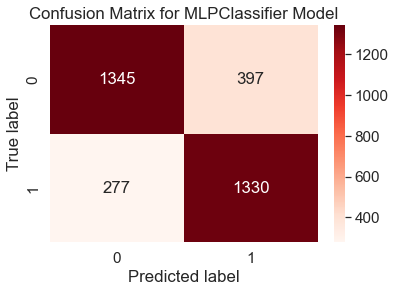

In [55]:
# Generating the confusion matrix

CM = confusion_matrix(y_test1, y_pred)

# Plotting the confusion matrix using Seaborn heatmap
sns.set(font_scale=1.4)
sns.heatmap(CM, annot=True, fmt='g', cmap="Reds", )

# Setting the labels for the axes
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for MLPClassifier Model')

# Showing the plot
plt.show()

In [56]:
#  checking the number of tp 
TP=CM[1,1]
TP

1330

In [90]:
print(classification_report(y_test1, mlp_final4.predict(X_test1)))
print('\n')

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1742
           1       0.77      0.83      0.80      1607

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349





lets create the ROC curve

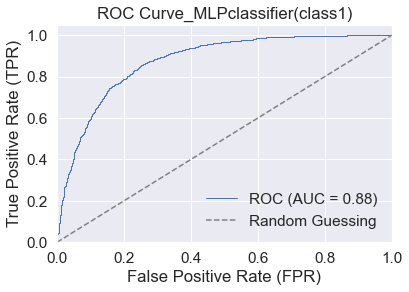

In [57]:

# Getting the predicted probabilities for the positive class
y_probability = mlp_final4.predict_proba(X_test1)[:, 1]

# Calculating the fpr and tpr
FP, TP, thresholds = roc_curve(y_test1, y_probability, pos_label=1)

# Calculating the area under the curve (AUC)
roc_auc = auc(FP, TP)

# Plotting the ROC curve
plt.plot(FP, TP, lw=1, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve_MLPclassifier(class1)')
plt.legend(loc="lower right")
plt.show()

# Implementing SVM

if we do not define the hyperparameters of the svm, it will use the default ones which are: c=1, kernel=rbf, and gamma=auto
first, we will try with the default parameters:

In [70]:
svc=SVC() # creating classifier with default hyperparameters
svc.fit(X_train1 ,y_train1 ) # fitting to the training data
y_pred=svc.predict(X_val1 ) # trying on the validation set
print(f'initial Train Accuracy - : {svc.score(X_train1,y_train1):.3f}')
print(f'initial validation Accuracy - : {svc.score(X_val1,y_val1):.3f}')

initial Train Accuracy - : 0.713
initial validation Accuracy - : 0.723


### Grid search for SVM

now i will apply grid search to get the best parameters for SVM model:

In [52]:
time_before=time.time() # in order to calculate the time the grid search takes to run

kernels = ['rbf', 'sigmoid']
C = list(10 ** np.arange(-3, 2, 1, dtype=float))
gammas = list(10 ** np.arange(-3, 2, 1, dtype=float))

svm_params_lin = {'C': C, 'kernel': ['linear']}
svm_params_rest = {'C': C, 'kernel': kernels, 'gamma': gammas}
svm_params = [svm_params_lin, svm_params_rest]

svm = SVC()
gridsearch_cv = GridSearchCV(svm, svm_params, cv=5,verbose=5)
gridsearch_cv.fit(X_train1,y_train1)

time_after=time.time()
time_spent=time_after-time_before
print(gridsearch_cv.best_params_)
time_spent

Fitting 5 folds for each of 55 candidates, totalling 275 fits
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.632 total time=   1.8s
[CV 2/5] END ............C=0.001, kernel=linear;, score=0.660 total time=   1.8s
[CV 3/5] END ............C=0.001, kernel=linear;, score=0.615 total time=   1.9s
[CV 4/5] END ............C=0.001, kernel=linear;, score=0.654 total time=   2.1s
[CV 5/5] END ............C=0.001, kernel=linear;, score=0.634 total time=   2.5s
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.669 total time=   2.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.689 total time=   1.7s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.679 total time=   1.5s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.671 total time=   1.6s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.667 total time=   1.4s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.710 total time=   1.4s
[CV 2/5] END ..............C=0.1, kernel=linear

[CV 2/5] END .C=0.01, gamma=0.1, kernel=sigmoid;, score=0.529 total time=   3.8s
[CV 3/5] END .C=0.01, gamma=0.1, kernel=sigmoid;, score=0.529 total time=   4.1s
[CV 4/5] END .C=0.01, gamma=0.1, kernel=sigmoid;, score=0.529 total time=   5.9s
[CV 5/5] END .C=0.01, gamma=0.1, kernel=sigmoid;, score=0.529 total time=   4.5s
[CV 1/5] END .....C=0.01, gamma=1.0, kernel=rbf;, score=0.529 total time=   4.0s
[CV 2/5] END .....C=0.01, gamma=1.0, kernel=rbf;, score=0.529 total time=   3.3s
[CV 3/5] END .....C=0.01, gamma=1.0, kernel=rbf;, score=0.529 total time=   3.7s
[CV 4/5] END .....C=0.01, gamma=1.0, kernel=rbf;, score=0.528 total time=   3.1s
[CV 5/5] END .....C=0.01, gamma=1.0, kernel=rbf;, score=0.528 total time=   4.0s
[CV 1/5] END .C=0.01, gamma=1.0, kernel=sigmoid;, score=0.529 total time=   2.5s
[CV 2/5] END .C=0.01, gamma=1.0, kernel=sigmoid;, score=0.529 total time=   2.5s
[CV 3/5] END .C=0.01, gamma=1.0, kernel=sigmoid;, score=0.529 total time=   2.5s
[CV 4/5] END .C=0.01, gamma=

[CV 4/5] END ..C=1.0, gamma=0.1, kernel=sigmoid;, score=0.503 total time=   1.7s
[CV 5/5] END ..C=1.0, gamma=0.1, kernel=sigmoid;, score=0.483 total time=   1.7s
[CV 1/5] END ......C=1.0, gamma=1.0, kernel=rbf;, score=0.679 total time=   2.9s
[CV 2/5] END ......C=1.0, gamma=1.0, kernel=rbf;, score=0.696 total time=   3.0s
[CV 3/5] END ......C=1.0, gamma=1.0, kernel=rbf;, score=0.700 total time=   3.4s
[CV 4/5] END ......C=1.0, gamma=1.0, kernel=rbf;, score=0.705 total time=   3.0s
[CV 5/5] END ......C=1.0, gamma=1.0, kernel=rbf;, score=0.673 total time=   2.9s
[CV 1/5] END ..C=1.0, gamma=1.0, kernel=sigmoid;, score=0.530 total time=   1.9s
[CV 2/5] END ..C=1.0, gamma=1.0, kernel=sigmoid;, score=0.526 total time=   2.1s
[CV 3/5] END ..C=1.0, gamma=1.0, kernel=sigmoid;, score=0.522 total time=   2.2s
[CV 4/5] END ..C=1.0, gamma=1.0, kernel=sigmoid;, score=0.518 total time=   2.9s
[CV 5/5] END ..C=1.0, gamma=1.0, kernel=sigmoid;, score=0.531 total time=   1.9s
[CV 1/5] END .....C=1.0, gam

837.1295030117035

now that we got the best parameters, i will apply it on the model

# SVM FINAL MODEL

In [110]:
svc_final=SVC(C= 10.0, gamma=0.1, kernel='rbf') # creating classifier with best hyperparameters
svc_final.fit(X_train1 ,y_train1 ) # fitting to the training data
y_pred=svc_final.predict(X_val1 ) # trying on the validation set
print(f'initial Train Accuracy - : {svc_final.score(X_train1,y_train1):.3f}')
print(f'initial validation Accuracy - : {svc_final.score(X_val1,y_val1):.3f}')

initial Train Accuracy - : 0.842
initial validation Accuracy - : 0.801


In [111]:
dump(svc_final,'SVC_final.joblib')

['SVC_final.joblib']

#### trying on the unseen test set:

In [112]:
svc_final=load('SVC_final.joblib')
y_pred = svc_final.predict(X_test1)
print(f' test Accuracy - : {svc_final.score(X_test1,y_test1):.5f}') # trying on the unseen test set

 test Accuracy - : 0.78232


we can see that the validation set accuracy improved by 6%

In [89]:
print(classification_report(y_test1, svc_final.predict(X_test1)))
print('\n')

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1742
           1       0.77      0.78      0.77      1607

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349





In [60]:
cm = confusion_matrix(y_test1, y_pred)
cm

array([[1378,  364],
       [ 346, 1261]], dtype=int64)

In [61]:
TP=cm[1,1]
TP

1261

In [62]:
TN=cm[0,0]
TN

1378

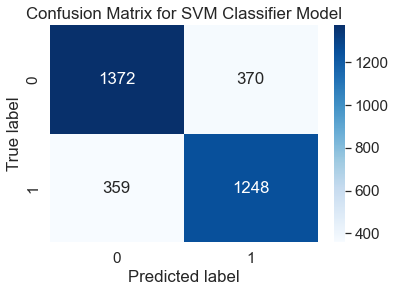

In [84]:
# Generating the confusion matrix

CM2 = confusion_matrix(y_test1, y_pred)

# Plotting the confusion matrix using Seaborn heatmap
sns.set(font_scale=1.4)
sns.heatmap(CM2, annot=True, fmt='g', cmap="Blues", )

# Setting the labels for the axes
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVM Classifier Model')

# Showing the plot
plt.show()





plotting ROC curve for svm, class 1:

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

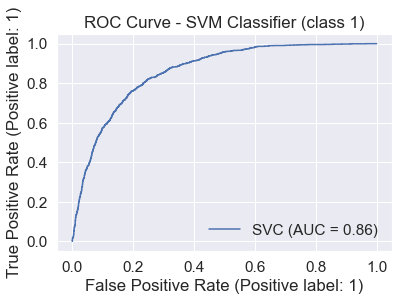

In [85]:

# Obtaining predicted probability scores for positive class
y_prob_scores = svc_final.decision_function(X_test1)

# Calculating false positive rate, true positive rate and threshold values
FP, TP, thresholds = roc_curve(y_test1, y_prob_scores, pos_label=1)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plot_roc_curve(svc_final, X_test1, y_test1, pos_label=1)
plt.title('ROC Curve - SVM Classifier (class 1)')
plt.show()

C:\Users\Asus NP\.conda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

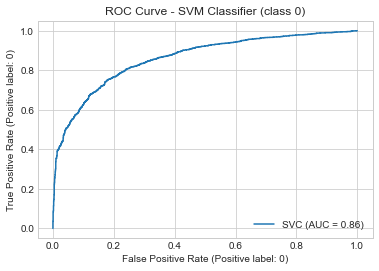

In [76]:
# Obtaining predicted probability scores for negative class
y_prob_scores = -svc_final.decision_function(X_test1)

# Calculating false positive rate, true positive rate and threshold values
FP, TP, thresholds = roc_curve(y_test1, y_prob_scores, pos_label=0)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plot_roc_curve(svc_final, X_test1, y_test1, pos_label=0)
plt.title('ROC Curve - SVM Classifier (class 0)')
plt.show()

## ROC curves 

here we will combine the roc curves of both models

[ 0.33173534  0.07212032 -1.27663447 ... -0.21534661 -0.23472759
  1.0051096 ]


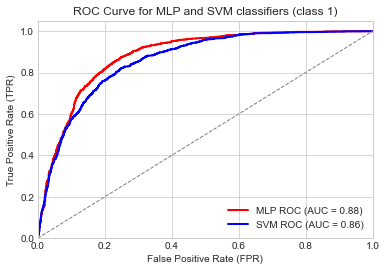

In [75]:
#  MLP classifier, Getting the predicted probabilities for the positive class 
y_mlp = mlp_final4.predict_proba(X_test1)[:, 1]

# MLP classifier, Calculating the fp and tp  
FP_mlp, TP_mlp, thresholds_mlp = roc_curve(y_test1, y_mlp, pos_label=1)

# MLP classifier, Calculating the AUC  
roc_mlp = auc(FP_mlp, TP_mlp)

# SVM classifier, Getting the predicted probabilities for the positive class  
y_svm = svc_final.decision_function(X_test1)
print(y_svm)
# SVM classifier, Calculating the fp and tp  
FP_svm, TP_svm, thresholds_svm = roc_curve(y_test1, y_svm, pos_label=1)

# SVM classifier, Calculating the AUC 
roc_svm = auc(FP_svm, TP_svm)

# Plotting the ROC curves for both mlp and svm
plt.plot(FP_mlp, TP_mlp, color='red', lw=2, label='MLP ROC (AUC = %0.2f)' % roc_mlp)
plt.plot(FP_svm, TP_svm, color='blue', lw=2, label='SVM ROC (AUC = %0.2f)' % roc_svm)

# Plotting the random guessing line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Setting the limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for MLP and SVM classifiers (class 1)')

# Adding the legend
plt.legend(loc="lower right")

# Showing the plot
plt.show()


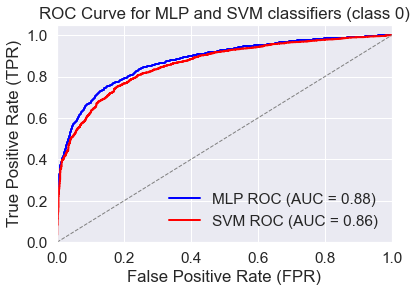

In [105]:
# MLP classifier, Getting the predicted probabilities for the positive class 
y_pred_proba_mlp = mlp_final4.predict_proba(X_test1)[:, 0]

# MLP classifier, Calculating the FP and TP 
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test1, y_pred_proba_mlp, pos_label=0)

# MLP classifier, Calculating AUC  
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# SVM classifier, Getting the predicted probabilities for the positive class  
y_scores_svm = svc_final.decision_function(X_test1)
y_scores_svm = [1-x for x in y_scores_svm]

# SVM classifier, Calculating the fp and tp  
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test1, y_scores_svm, pos_label=0)

# SVM classifier, Calculating the AUC 
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotting the ROC curves for mlp and svm
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label='MLP ROC (AUC = %0.2f)' % roc_auc_mlp)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM ROC (AUC = %0.2f)' % roc_auc_svm)

# Plotting the random guessline
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Setting the limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for MLP and SVM classifiers (class 0)')

# Addding the legend
plt.legend(loc="lower right")

# Showing the plot
plt.show()


# RUN THIS PART FOR TESTING:

In [2]:
bank1=pd.read_csv('bank1.csv') # loading the encoded and normalized data

In [3]:
# the code in this cell is similar to the group coursework
scaler = MinMaxScaler() # Function to prepare the data for training and test

def prepare_data(bank1):
    X = bank1.iloc[:, 0:-1]
    y = bank1['deposit']
    print(X)
    
# splitting into trainval and test sets
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True) # spliting the data into 30% test and 70% train
    
# separating 10% of trainval set as validation set 
    X_train, X_val, y_train, y_val= train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=42, shuffle=True) # splitting the training set into train and validation sets

# changing into numpy array
    X_trainval1 =np.array(X_trainval)
    X_test1 =np.array(X_test)
    y_trainval1 =np.array(y_trainval)
    y_test1 =np.array(y_test)
    
    X_train1=np.array(X_train)
    X_val1=np.array(X_val)
    y_train1=np.array(y_train)
    y_val1=np.array(y_val)
    
    
    return X_trainval1, X_test1, X_train1, X_val1, y_trainval1, y_test1,y_train1, y_val1

X_trainval1, X_test1, X_train1, X_val1,y_trainval1, y_test1, y_train1, y_val1 = prepare_data(bank1) # Show the data

            age  job  marital  education  default   balance  housing  loan  \
0      0.023002    0        1          1        0  0.913471        1     0   
1      0.038127    0        1          1        0  0.030638        0     0   
2      0.021779    9        1          1        0  0.674623        1     0   
3      0.021625    7        1          1        0  0.973501        1     0   
4      0.077164    0        1          2        0  0.262929        0     0   
...         ...  ...      ...        ...      ...       ...      ...   ...   
11157  0.126979    1        2          0        0  0.003848        1     0   
11158  0.052781    7        1          1        0  0.992016        0     0   
11159  0.196326    9        2          1        0  0.177921        0     0   
11160  0.241867    9        1          1        0  0.000000        0     1   
11161  0.054055    9        1          1        0  0.000000        0     0   

       contact       day  month  duration  campaign     pdays  

In [4]:
# mlp final model:
mlp_final4=load('MLP_final.joblib')
y_pred = mlp_final4.predict(X_test1)
print(f' test Accuracy - : {mlp_final4.score(X_test1,y_test1):.5f}')

 test Accuracy - : 0.79546


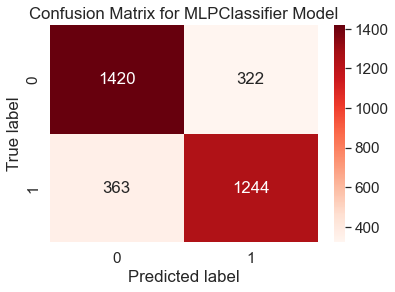

In [5]:
# Generating the confusion matrix for mlp

CM = confusion_matrix(y_test1, y_pred)

# Plotting the confusion matrix using Seaborn heatmap
sns.set(font_scale=1.4)
sns.heatmap(CM, annot=True, fmt='g', cmap="Reds", )

# Setting the labels for the axes
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for MLPClassifier Model')

# Showing the plot
plt.show()

In [6]:
# svm final model:
svc_final=load('SVC_final.joblib')
y_pred = svc_final.predict(X_test1)
print(f' test Accuracy - : {svc_final.score(X_test1,y_test1):.5f}') # trying on the unseen test set

 test Accuracy - : 0.78232


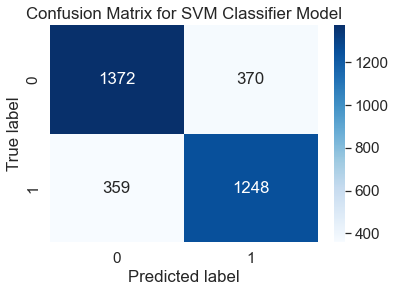

In [7]:
# Generating the confusion matrix for svm:

CM2 = confusion_matrix(y_test1, y_pred)

# Plotting the confusion matrix using Seaborn heatmap
sns.set(font_scale=1.4)
sns.heatmap(CM2, annot=True, fmt='g', cmap="Blues", )

# Setting the labels for the axes
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVM Classifier Model')

# Showing the plot
plt.show()


[ 0.33173534  0.07212032 -1.27663447 ... -0.21534661 -0.23472759
  1.0051096 ]


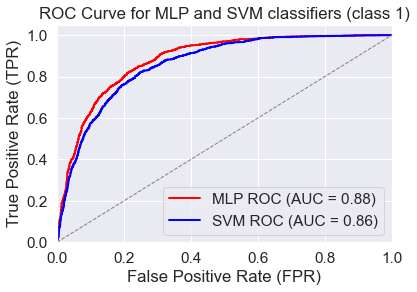

In [8]:
# ROC curve:
#  MLP classifier, Getting the predicted probabilities for the positive class 
y_mlp = mlp_final4.predict_proba(X_test1)[:, 1]

# MLP classifier, Calculating the fp and tp  
FP_mlp, TP_mlp, thresholds_mlp = roc_curve(y_test1, y_mlp, pos_label=1)

# MLP classifier, Calculating the AUC  
roc_mlp = auc(FP_mlp, TP_mlp)

# SVM classifier, Getting the predicted probabilities for the positive class  
y_svm = svc_final.decision_function(X_test1)
print(y_svm)
# SVM classifier, Calculating the fp and tp  
FP_svm, TP_svm, thresholds_svm = roc_curve(y_test1, y_svm, pos_label=1)

# SVM classifier, Calculating the AUC 
roc_svm = auc(FP_svm, TP_svm)

# Plotting the ROC curves for both mlp and svm
plt.plot(FP_mlp, TP_mlp, color='red', lw=2, label='MLP ROC (AUC = %0.2f)' % roc_mlp)
plt.plot(FP_svm, TP_svm, color='blue', lw=2, label='SVM ROC (AUC = %0.2f)' % roc_svm)

# Plotting the random guessing line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Setting the limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for MLP and SVM classifiers (class 1)')

# Adding the legend
plt.legend(loc="lower right")

# Showing the plot
plt.show()


## Codes related to intermediate results, that were not used for final models:

below is the code of the separate grid searches that we created at the beginning:

In [ ]:
# frist grid search:
time_before=time.time()
params = {

    'hidden_layer_sizes': [(11,), (13,),(15,),(11, 13,),(11, 11,),(11,15,),(13,15,),(13, 11,),(13,13,),(15,11,),(15,13,),(15,15,)], # the dimension of the tuples give us the number of hidden layers
    'learning_rate_init': [0.01,0.1,1],
    'momentum': [0.1,0.5,0.9],
    'solver':['sgd', 'adam']
}

gsearch = GridSearchCV(mlp, params, cv=5,verbose=5) 
gsearch.fit(X_train1, y_train1)

time_after=time.time()
time_spent=time_after-time_before
time_spent
print(gsearch.best_params_)

In [ ]:
# the second grid search
time_before=time.time()
params = {
    
    
    'max_iter': [100,500,1000,1500,2000], 
    'batch_size': [100, 200, 500,1000], 
    'activation': ['relu','softmax','tanh']
    
}

gsearch = GridSearchCV(mlp_final1, params, cv=5,verbose=5) 
gsearch.fit(X_train1, y_train1)

time_after=time.time()
time_spent=time_after-time_before
time_spent
print(gsearch.best_params_)

In [ ]:
# third grid search:
time_before=time.time()
params = {
    
    
    'alpha': [0.001,0.01,0.1,1,10], # hyperparameter for l2 regularization
    'n_iter_no_change':[5,10,15,25], # the best least number of consecutive epochs to stop the trainig process when the training performnce is not improved by at least 1e-4
    

    
}

gsearch = GridSearchCV(mlp_final2, params, cv=5,verbose=True) 
gsearch.fit(X_train1, y_train1)

time_after=time.time()
time_spent=time_after-time_before
time_spent

In [ ]:
# this code is for applying weight decay regularization:
mlp_final3=MLPClassifier(hidden_layer_sizes=(15,), activation='tanh', solver='adam', max_iter=2000,batch_size=100,learning_rate_init=0.01,alpha=0.001)
mlp_final3.fit(X_train1 ,y_train1 ) # fitting to the training data
y_pred=mlp_final2.predict(X_test1 ) # trying on the test set

print(f' Train Accuracy - : {mlp_final2.score(X_train1,y_train1):.3f}')
print(f' Test Accuracy - : {mlp_final2.score(X_test1,y_test1):.3f}')

In [ ]:
# this code is fro applying weight decay + early stopping regularizations:
mlp_final3=MLPClassifier(hidden_layer_sizes=(15,), activation='tanh', solver='adam', max_iter=2000,batch_size=100,learning_rate_init=0.01,alpha=0.001,early_stopping=True)
mlp_final3.fit(X_train1 ,y_train1 ) # fitting to the training data
y_pred=mlp_final2.predict(X_test1 ) # trying on the test set

print(f' Train Accuracy - : {mlp_final2.score(X_train1,y_train1):.3f}')
print(f' Test Accuracy - : {mlp_final2.score(X_test1,y_test1):.3f}')

the few cells below are the codes for playing around svm model parameters before applying grid search:

In [ ]:
# trying with RBF kernel and C=10

svc=SVC(C=10.0) 

svc.fit(X_train1,y_train1)

y_pred=svc.predict(X_val1)

print('Accuracy of SVM model with rbf kernel and C=10: {0:0.4f}'. format(accuracy_score(y_val1, y_pred)))

In [ ]:
# trying with RBF kernel and C=100

svc=SVC(C=100.0) 

svc.fit(X_train1,y_train1)

y_pred=svc.predict(X_val1)

print('Accuracy of SVM model with rbf kernel and C=100: {0:0.4f}'. format(accuracy_score(y_val1, y_pred)))

In [ ]:
# trying with RBF kernel and C=1000

svc=SVC(C=1000.0) 

svc.fit(X_train1,y_train1)

y_pred=svc.predict(X_val1)

print('Accuracy of SVM model with rbf kernel and C=1000: {0:0.4f}'. format(accuracy_score(y_val1, y_pred)))

In [ ]:
# trying with Linear kernel and C=1

linear_svc=SVC(kernel='linear', C=1.0) 

linear_svc.fit(X_train1,y_train1)

y_pred_test=linear_svc.predict(X_test1)

print('Accuracy of SVM model with Linear kernel and C=1 : {0:0.4f}'. format(accuracy_score(y_test1, y_pred_test)))

In [ ]:
# trying with Linear kernel and C=10

linear_svc=SVC(kernel='linear', C=10.0) 

linear_svc.fit(X_train1,y_train1)

y_pred_test=linear_svc.predict(X_test1)

print('Accuracy of SVM model with Linear kernel and C=10 : {0:0.4f}'. format(accuracy_score(y_test1, y_pred_test)))

In [ ]:
# trying with Linear kernel and C=100

linear_svc=SVC(kernel='linear', C=100.0) 

linear_svc.fit(X_train1,y_train1)

y_pred_test=linear_svc.predict(X_test1)

print('Accuracy of SVM model with Linear kernel and C=100 : {0:0.4f}'. format(accuracy_score(y_test1, y_pred_test)))

In [ ]:
# trying with Linear kernel and C=1000

linear_svc=SVC(kernel='linear', C=1000.0) 

linear_svc.fit(X_train1,y_train1)

y_pred_test=linear_svc.predict(X_test1)

print('Accuracy of SVM model with Linear kernel and C=1000 : {0:0.4f}'. format(accuracy_score(y_test1, y_pred_test)))

In [ ]:
# trying with Polynomial kernel and C=100

linear_svc=SVC(kernel='poly', C=100.0) 

linear_svc.fit(X_train1,y_train1)

y_pred_test=linear_svc.predict(X_test1)

print('Accuracy of SVM model with Linear kernel and C=100 : {0:0.4f}'. format(accuracy_score(y_test1, y_pred_test)))

In [ ]:
# trying with Polynomial kernel and C=1000

linear_svc=SVC(kernel='poly', C=1000.0) 

linear_svc.fit(X_train1,y_train1)

y_pred_test=linear_svc.predict(X_test1)

print('Accuracy of SVM model with Linear kernel and C=1000 : {0:0.4f}'. format(accuracy_score(y_test1, y_pred_test)))